In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('./nyt-frame.csv', header = 0)
data = df.iloc[:,9:]
array = data.values

//arpack dobry solver dla macierzy rzadkich

In [2]:
header = list(df.columns.values[9:])
sample_word = np.random.choice(header, 20, replace=False)
print(sample_word)

['while.' 'derived' 'progress' 'subversive' 'city' 'orchard' 'words'
 'puns' 'too' 'primary' 'entrances' 'hide' 'up' 'hour' 'campus' 'thought'
 'finding' 'compared' 'expansion' 'dawn']


In [3]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(array)

In [8]:
indices = list(zip(*sorted(
    list(enumerate(pca.components_[0])),
    key=lambda x: x[1], reverse=True
)[:15]))[0]

for i in indices:
    print(i, header[i])

3530 she
1794 her
2517 ms
1875 i
3394 said
2498 mother
875 cooper
2538 my
2761 painting
3013 process
2762 paintings
1899 im
2516 mrs
1771 he
2373 me


Są to w większości słówka, które muszą pojawiać się w tekście dość często, gdyż są tak ogólne. Największą grupę z nich tworzą różnego rodzaju zaimki, e.g.: she, her, my, he, me, oraz inne określenia osoby: ms, mrs, mother. Tylko niektóre, jak painting czy process są odrobinkę bardziej charakterystyczne.

In [5]:
indices = list(zip(*sorted(
    list(enumerate(pca.components_[0])),
    key=lambda x: x[1], reverse=False
)[:15]))[0]

for i in indices:
    print(i, header[i])

2529 music
4099 trio
3963 theater
2707 orchestra
799 composers
2691 opera
3964 theaters
2300 m
3032 program
2905 players
1457 festival
1202 east
4401 y
2059 jersey
3898 symphony


W tym wypadku mamy do czynienia w przeważającej większości ze słówkami, które mają sporo wspólnego z domeną artykulów, czyli sztuką i muzyką, lecz raczej nie są one skojarzeniami w pierwszej linii.

In [6]:
indices = list(zip(*sorted(
    list(enumerate(pca.components_[1])),
    key=lambda x: x[1], reverse=True
)[:15]))[0]

for i in indices:
    print(i, header[i])

1794 her
3530 she
3963 theater
2691 opera
2517 ms
1875 i
1851 hour
3408 sang
3022 production
1457 festival
2529 music
2530 musical
3665 songs
2707 orchestra
4233 vocal


Poza kilkoma zaimkami i określeniami osób, mamy tu słówka stanowiące mocne skojarzenia z domeną artykułów. Za przykład można podać: music, songs, sang, festival itd.

In [7]:
indices = list(zip(*sorted(
    list(enumerate(pca.components_[1])),
    key=lambda x: x[1], reverse=False
)[:15]))[0]

for i in indices:
    print(i, header[i])

235 art
2527 museum
1901 images
244 artists
1139 donations
2528 museums
2761 painting
3922 tax
2762 paintings
3450 sculpture
1606 gallery
3451 sculptures
2757 painted
4315 white
3502 service


Tak jak w przypadku pierszego komponetu wiodącego, tak i tutaj dla słów posortowanych względem ich wartości drugiego komponentu wiodącego w kierunku rosnącym i biorąc 15 o najmiejszych wartościach, otrzymujemy w większości słówka mocno związane z domeną artykułow, lecz nie nazbyt często używane.

In [11]:
reds = []
blues = []
article_classes = df.iloc[:,1].values
for i in range(len(article_classes)):
    if article_classes[i] == "art":
        reds.append(i)
    elif article_classes[i] == "music":
        blues.append(i)


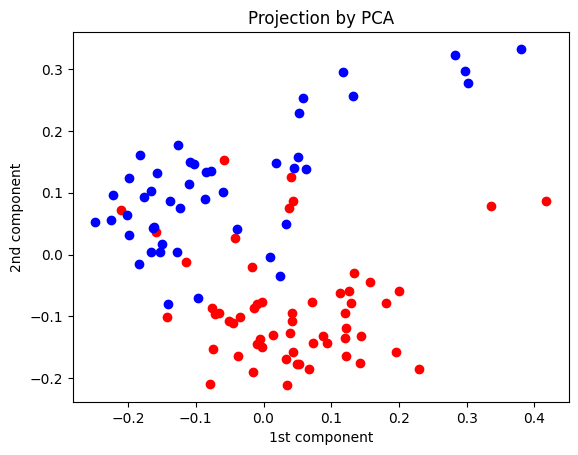

In [12]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X_pca[np.array(reds), 0], X_pca[np.array(reds), 1], c="red")
plt.scatter(X_pca[np.array(blues), 0], X_pca[np.array(blues), 1], c="blue")
plt.title("Projection by PCA")
plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.show()

Mimo iż kompletna separacja artykułów tych dwóch klas prostą funkcją nie jest możliwa, jasno widać klastry utworzone przez artykuły tej samej klasy.

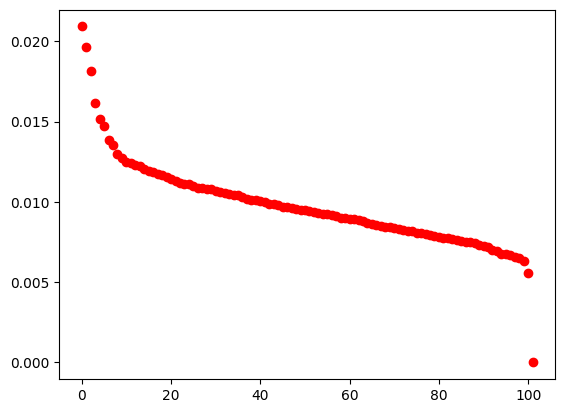

0.15773478029003477


In [16]:
variance_ratio = pca.explained_variance_ratio_
plt.plot(variance_ratio, 'ro')
plt.show()
print(sum(variance_ratio[0:10]))

Po wykonaniu projekcji na 10 pierwszych komponentów wiodących, zostanie zachowanych ponad 15% wariancji.